In [189]:
from langchain.tools import tool

@tool
def fetch_orders():
    """Fetches customer's orders."""

    orders = ["주문 번호: 1 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3"
              "주문 번호: 2 상품명: 개별 모듬팩, 가격: 1000원, 수량: 7",]
    return "찍짝짝! 주문 조회 완료"

@tool
def ask_how_to_change():
    """Asks customer how to change existing order"""
    return "주문을 어떻게 변경하렵니까 휴먼?"

@tool
def request_approval():
    """Requests customer to approve or disapprove the orders to be changed"""
    return "이대로 주문을 변경할까유?"

@tool
def change_order():
    """Changes existing order"""
    return "주문 변경 성공"

In [5]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

from chain.langgraph_graphs import request_approval

order_change_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
            너는 주문 변경을 담당하는 유능한 비서야.
            적절한 도구를 사용해 고객의 요청을 처리해.

            고객에게 변경할 기존 주문 내역을 제시하지 않았다면 fetch_orders를 사용해야 해.
            고객이 변경할 주문을 선택한 다음에는 ask_how_to_change를 사용해야 해.
            고객이 어떻게 주문을 변경할지 말한 다음에는 request_approval를 사용해야 해.
            고객이 진행할 주문 변경을 승인했다면 change_order를 사용해야 해.
            """,
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

llm =  ChatOpenAI()
tools = [fetch_orders, ask_how_to_change, request_approval, change_order]
order_change_runnable = order_change_prompt | llm.bind_tools(tools)

왜 바로 메시지가 안 나오고 다음 턴에 두 개가 나오는 거지?

In [10]:
message = ""
while True:
    message = input()
    if message == "stop":
        break
    output = order_change_runnable.invoke({"messages": [("user", message)]})
    print(output)

content='' additional_kwargs={'tool_calls': [{'id': 'call_zAin1qMrTLzXOrWjCq5gGIJq', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 271, 'total_tokens': 281}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None} id='run-6b510fa4-9626-4c66-8aaa-aeb241f1c468-0' tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_zAin1qMrTLzXOrWjCq5gGIJq'}]
content='' additional_kwargs={'tool_calls': [{'id': 'call_s1juqlXqmcTNoBcgLyfwmyf8', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 272, 'total_tokens': 282}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None} id='run-c3d94385-df04-4bd2-afc4-be0be0dddd5f-0' tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_s1

In [ ]:
from langgraph.checkpoint.sqlite import SqliteSaver

memory = SqliteSaver.from_conn_string(":memory:")

In [11]:
message = "주문 바꿀려고요"
output = order_change_runnable.invoke({"messages": [("user", message)]},
                                      )
output

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_XKkA4Fr7fynl1vN2rTnJijEw', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 275, 'total_tokens': 285}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b96ba97a-fb99-4043-bba5-b04b2d82f0fb-0', tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_XKkA4Fr7fynl1vN2rTnJijEw'}])

In [12]:
message = "주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3"
output = order_change_runnable.invoke({"messages": [("user", message)]})
output

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_tEbXXeJ047kZHgEVa3amrBxd', 'function': {'arguments': '{}', 'name': 'ask_how_to_change'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 306, 'total_tokens': 319}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-828cadb6-666c-48b0-bbeb-06d2e930a08f-0', tool_calls=[{'name': 'ask_how_to_change', 'args': {}, 'id': 'call_tEbXXeJ047kZHgEVa3amrBxd'}])

In [13]:
message = "떡케익 2개로 바꿀게요"
output = order_change_runnable.invoke({"messages": [("user", message)]})
output

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_JNnuzzrcnt43ig1iiwJYfmSr', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 283, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-708bb22f-8972-4549-bb63-19a07ff55d5e-0', tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_JNnuzzrcnt43ig1iiwJYfmSr'}])

기억 문제인 듯 해 메모리 추가

In [21]:
from langchain_community.chat_message_histories import SQLChatMessageHistory


def get_session_history(session_id):
    return SQLChatMessageHistory(session_id, "sqlite:///memory.db")

In [22]:
from langchain_core.runnables.history import RunnableWithMessageHistory


with_message_history = RunnableWithMessageHistory(
    # The underlying runnable
    order_change_runnable,  
    # A function that takes in a session id and returns a memory object
    get_session_history,  
    # Other parameters that may be needed to align the inputs/outputs
    # of the Runnable with the memory object
)

In [23]:
message = "주문하려고요"

output = with_message_history.invoke(
    # The same input as before
    {"message": [("user", message)]},
    # Configuration specifying the `session_id`,
    # which controls which conversation to load
    config={"configurable": {"session_id": "abc123"}},
)
output.additional_kwargs["tool_calls"][0]["function"]["name"]

Parent run c511ddb7-fb91-4e3b-b542-4d0c461304a6 not found for run 0f83d7af-7c93-4b7d-8b33-ab6b9c4b8ecb. Treating as a root run.
Error in RootListenersTracer.on_chain_end callback: AttributeError("'tuple' object has no attribute 'type'")


'fetch_orders'

In [24]:
message = "주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3"

output = with_message_history.invoke(
    # The same input as before
    {"message": [("user", message)]},
    # Configuration specifying the `session_id`,
    # which controls which conversation to load
    config={"configurable": {"session_id": "abc123"}},
)
output.additional_kwargs["tool_calls"][0]["function"]["name"]

Parent run 546a7807-ffd7-41a3-8af3-e2a2372b0cd6 not found for run 986110da-e443-4fde-94f2-c5a015c3839a. Treating as a root run.
Error in RootListenersTracer.on_chain_end callback: AttributeError("'tuple' object has no attribute 'type'")


'ask_how_to_change'

In [25]:
message = "개별 모듬팩 3개로 바꿀게요"

output = with_message_history.invoke(
    # The same input as before
    {"message": [("user", message)]},
    # Configuration specifying the `session_id`,
    # which controls which conversation to load
    config={"configurable": {"session_id": "abc123"}},
)
output.additional_kwargs["tool_calls"][0]["function"]["name"]

Parent run 931fab05-5392-45d5-bfb4-d7cb03cae850 not found for run bb2d0bcb-d624-4b34-a2b4-98335b233641. Treating as a root run.
Error in RootListenersTracer.on_chain_end callback: AttributeError("'tuple' object has no attribute 'type'")


'fetch_orders'

langsmith 확인 결과 memory가 정상 동작하지 않는 것 같음

In [30]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph.message import AnyMessage, add_messages


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [33]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.sqlite import SqliteSaver

builder = StateGraph(State)
builder.add_node("order_change_assistant", order_change_runnable.invoke)
builder.set_entry_point("order_change_assistant")
builder.set_finish_point("order_change_assistant")

memory = SqliteSaver.from_conn_string(":memory:")
graph = builder.compile(
    checkpointer=memory
)

In [35]:
thread_id = "cheer up!"
config = {
    "configurable": {
        "thread_id": thread_id,
    }
}

In [36]:
message = "떡케익 2개로 바꿀게요"
output = graph.invoke({"messages": [("user", message)]},
                      config)
output

InvalidUpdateError: Expected dict, got content='' additional_kwargs={'tool_calls': [{'id': 'call_8jbYm8YQXVFO5X701a9l1pTe', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 283, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None} id='run-4b81156a-665a-411f-a3ad-e866db4f9f9c-0' tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_8jbYm8YQXVFO5X701a9l1pTe'}]

In [37]:
builder = StateGraph(State)
builder.add_node("order_change_assistant", order_change_runnable.invoke)
builder.set_entry_point("order_change_assistant")
builder.add_edge("order_change_assistant", END)

memory = SqliteSaver.from_conn_string(":memory:")
graph = builder.compile(
    checkpointer=memory
)

In [38]:
message = "떡케익 2개로 바꿀게요"
output = graph.invoke({"messages": [("user", message)]},
                      config)
output

InvalidUpdateError: Expected dict, got content='' additional_kwargs={'tool_calls': [{'id': 'call_dk0vz56CLzgI6KOZ9uaySEo2', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 283, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None} id='run-51188d91-23f1-44e0-b26a-a422df15cd34-0' tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_dk0vz56CLzgI6KOZ9uaySEo2'}]

In [42]:
def order_change_agent(state):
    print("state\n", state)
    message = state["messages"]
    print("message\n", message)
    output = order_change_runnable.invoke({"messages": message})
    return output

In [46]:
builder = StateGraph(State)
builder.add_node("order_change_assistant", order_change_agent)
builder.set_entry_point("order_change_assistant")
builder.set_finish_point("order_change_agent")

memory = SqliteSaver.from_conn_string(":memory:")
graph = builder.compile(
    checkpointer=memory
)

ValueError: Found edge starting at unknown node 'order_change_agent'

In [47]:
message = "떡케익 2개로 바꿀게요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output({"messages": [("user", message)]},
                      config)
output

state
 {'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='349c491d-f320-448a-ae02-d8ae08caddfc'), HumanMessage(content='떡케익 2개로 바꿀게요', id='0cc963c4-2d65-4679-8883-f3e2612bccd1')]}
message
 [HumanMessage(content='떡케익 2개로 바꿀게요', id='349c491d-f320-448a-ae02-d8ae08caddfc'), HumanMessage(content='떡케익 2개로 바꿀게요', id='0cc963c4-2d65-4679-8883-f3e2612bccd1')]


InvalidUpdateError: Expected dict, got content='' additional_kwargs={'tool_calls': [{'id': 'call_nOiiz0YbIv8CxQuYE6h5oUHb', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 305, 'total_tokens': 315}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None} id='run-f1e23793-6dd3-4834-a82b-c0ffdfa7558e-0' tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_nOiiz0YbIv8CxQuYE6h5oUHb'}]

In [48]:
builder = StateGraph(State)
builder.add_node("order_change_assistant", order_change_agent)
builder.set_entry_point("order_change_assistant")
builder.add_node(END)
builder.add_edge("order_change_agent", END)

memory = SqliteSaver.from_conn_string(":memory:")
graph = builder.compile(
    checkpointer=memory
)

ValueError: Node `__end__` is reserved.

In [50]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.sqlite import SqliteSaver

builder = StateGraph(State)
builder.add_node("order_change_assistant", order_change_agent)
builder.add_edge(START, "order_change_assistant")
builder.add_edge("order_change_assistant", END)

memory = SqliteSaver.from_conn_string(":memory:")
graph = builder.compile(
    checkpointer=memory
)

In [51]:
message = "떡케익 2개로 바꿀게요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output({"messages": [("user", message)]},
                      config)
output

state
 {'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='0254ad13-7b6b-46ca-b7ba-471c0612979d')]}
message
 [HumanMessage(content='떡케익 2개로 바꿀게요', id='0254ad13-7b6b-46ca-b7ba-471c0612979d')]


InvalidUpdateError: Expected dict, got content='' additional_kwargs={'tool_calls': [{'id': 'call_FsL3Z6pJTP1a4pWwHw2Wl8Xu', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 283, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None} id='run-3b407adc-2b8a-405b-892a-8b8b25eb323e-0' tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_FsL3Z6pJTP1a4pWwHw2Wl8Xu'}]

In [52]:
def order_change_agent(state):
    print("state\n", state)
    message = state["messages"]
    print("message\n", message)
    output = order_change_runnable.invoke({"messages": message})
    output = output.additional_kwargs["tool_calls"][0]["function"]
    return output

In [53]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.sqlite import SqliteSaver

builder = StateGraph(State)
builder.add_node("order_change_assistant", order_change_agent)
builder.add_edge(START, "order_change_assistant")
builder.add_edge("order_change_assistant", END)

memory = SqliteSaver.from_conn_string(":memory:")
graph = builder.compile(
    checkpointer=memory
)

In [54]:
message = "떡케익 2개로 바꿀게요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output({"messages": [("user", message)]},
                      config)
output

state
 {'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='b24d6cf6-ee86-45c7-8cd7-64944629e111')]}
message
 [HumanMessage(content='떡케익 2개로 바꿀게요', id='b24d6cf6-ee86-45c7-8cd7-64944629e111')]


InvalidUpdateError: Must write to at least one of ['messages']

In [55]:
def order_change_agent(state):
    print("state\n", state)
    message = state["messages"]
    print("message\n", message)
    output = order_change_runnable.invoke({"messages": message})
    output = output.additional_kwargs["tool_calls"][0]["function"]
    output["role"] = 
    return {"messages": output}

In [56]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.sqlite import SqliteSaver

builder = StateGraph(State)
builder.add_node("order_change_assistant", order_change_agent)
builder.add_edge(START, "order_change_assistant")
builder.add_edge("order_change_assistant", END)

memory = SqliteSaver.from_conn_string(":memory:")
graph = builder.compile(
    checkpointer=memory
)

In [57]:
message = "떡케익 2개로 바꿀게요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output({"messages": [("user", message)]},
                      config)
output

state
 {'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='e3e047ad-9ada-44d1-9fb0-b135a1b00803')]}
message
 [HumanMessage(content='떡케익 2개로 바꿀게요', id='e3e047ad-9ada-44d1-9fb0-b135a1b00803')]


ValueError: Message dict must contain 'role' and 'content' keys, got {'arguments': '{}', 'name': 'fetch_orders'}

In [62]:
def order_change_agent(state):
    print("state\n", state)
    message = state["messages"]
    print("message\n", message)
    output = order_change_runnable.invoke({"messages": message})
    print(output)
    
    return {"messages": output}

In [63]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.sqlite import SqliteSaver

builder = StateGraph(State)
builder.add_node("order_change_assistant", order_change_agent)
builder.add_edge(START, "order_change_assistant")
builder.add_edge("order_change_assistant", END)

memory = SqliteSaver.from_conn_string(":memory:")
graph = builder.compile(
    checkpointer=memory
)

In [64]:
message = "떡케익 2개로 바꿀게요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output({"messages": [("user", message)]},
                      config)
output

state
 {'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='d3741617-2d1e-4591-a47c-b2cd673d7a9f')]}
message
 [HumanMessage(content='떡케익 2개로 바꿀게요', id='d3741617-2d1e-4591-a47c-b2cd673d7a9f')]
content='' additional_kwargs={'tool_calls': [{'id': 'call_3cPewdi7xaQtDJSnrd4p7MS2', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 283, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None} id='run-f3327b4f-4228-4211-9e09-be60e53d5d55-0' tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_3cPewdi7xaQtDJSnrd4p7MS2'}]


TypeError: 'AddableValuesDict' object is not callable

In [65]:
def order_change_agent(state):
    print("state\n", state)
    message = state["messages"]
    print("message\n", message)
    output = order_change_runnable.invoke({"messages": message})
    print(output)
    
    return {"messages": [output]}

In [66]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.sqlite import SqliteSaver

builder = StateGraph(State)
builder.add_node("order_change_assistant", order_change_agent)
builder.add_edge(START, "order_change_assistant")
builder.add_edge("order_change_assistant", END)

memory = SqliteSaver.from_conn_string(":memory:")
graph = builder.compile(
    checkpointer=memory
)

In [67]:
message = "떡케익 2개로 바꿀게요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output({"messages": [("user", message)]},
                      config)
output

state
 {'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='91852fca-29fb-4484-aaf6-c883404bce00')]}
message
 [HumanMessage(content='떡케익 2개로 바꿀게요', id='91852fca-29fb-4484-aaf6-c883404bce00')]
content='' additional_kwargs={'tool_calls': [{'id': 'call_vpckbrkfrqHJDd39KxZKsMXk', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 283, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None} id='run-49e8d94a-7331-43ef-ac95-437330728c12-0' tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_vpckbrkfrqHJDd39KxZKsMXk'}]


TypeError: 'AddableValuesDict' object is not callable

In [68]:
from langchain_core.messages import AIMessage

def order_change_agent(state):
    print("state\n", state)
    message = state["messages"]
    print("message\n", message)
    output = order_change_runnable.invoke({"messages": message})
    output = output.additional_kwargs["tool_calls"][0]["function"]["name"]
    print(output)
    message = AIMessage(content=output)
    
    return {"messages": [message]}

In [69]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.sqlite import SqliteSaver

builder = StateGraph(State)
builder.add_node("order_change_assistant", order_change_agent)
builder.add_edge(START, "order_change_assistant")
builder.add_edge("order_change_assistant", END)

memory = SqliteSaver.from_conn_string(":memory:")
graph = builder.compile(
    checkpointer=memory
)

In [70]:
message = "떡케익 2개로 바꿀게요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output({"messages": [("user", message)]},
                      config)
output

state
 {'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='14281e30-425a-4efb-875f-4b4cfea5c4af')]}
message
 [HumanMessage(content='떡케익 2개로 바꿀게요', id='14281e30-425a-4efb-875f-4b4cfea5c4af')]
fetch_orders


TypeError: 'AddableValuesDict' object is not callable

---

In [74]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [75]:
def chatbot(state: State):
    return {"messages": [order_change_runnable.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [76]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

memory = SqliteSaver.from_conn_string(":memory:")
graph = graph_builder.compile(
    checkpointer=memory
)

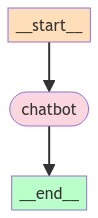

In [77]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [78]:
message = "떡케익 2개로 바꿀게요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output({"messages": [("user", message)]},
                      config)
output

TypeError: 'AddableValuesDict' object is not callable

In [80]:
def debug_node(state):
    print("debug_node 진입")
    print("state\n", state)
    return {"messages": [AIMessage(content="I am helping you debugging")]}

In [81]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.sqlite import SqliteSaver

builder = StateGraph(State)
builder.add_node("order_change_assistant", order_change_agent)
builder.add_node("debug_node", debug_node)
builder.add_edge(START, "order_change_assistant")
builder.add_edge("order_change_assistant", "debug_node")
builder.add_edge("debug_node", END)


memory = SqliteSaver.from_conn_string(":memory:")
graph = builder.compile(
    checkpointer=memory
)

In [82]:
message = "떡케익 2개로 바꿀게요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output({"messages": [("user", message)]},
                      config)
output

state
 {'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='93bd1b6e-29df-40d2-ad52-7c9ac9a02b62')]}
message
 [HumanMessage(content='떡케익 2개로 바꿀게요', id='93bd1b6e-29df-40d2-ad52-7c9ac9a02b62')]
fetch_orders
debug_node 진입
state
 {'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='93bd1b6e-29df-40d2-ad52-7c9ac9a02b62'), AIMessage(content='fetch_orders', id='679b69ff-6e9a-452c-a4a0-e909cf53097e')]}


TypeError: 'AddableValuesDict' object is not callable

In [83]:
def debug_node(state):
    print("debug_node 진입")
    print("state\n", state)
    return {"messages": AIMessage(content="I am helping you debugging")}

In [88]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.sqlite import SqliteSaver

builder = StateGraph(State)
builder.add_node("order_change_assistant", order_change_agent)
builder.add_node("debug_node", debug_node)
builder.add_edge(START, "order_change_assistant")
builder.add_edge("order_change_assistant", "debug_node")
builder.add_edge("debug_node", END)


memory = SqliteSaver.from_conn_string(":memory:")
graph = builder.compile(
    checkpointer=memory
)

In [89]:
message = "떡케익 2개로 바꿀게요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output({"messages": [("user", message)]},
                      config)
output

state
 {'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='32837e4a-977f-486e-b970-02dcdc8a715c')]}
message
 [HumanMessage(content='떡케익 2개로 바꿀게요', id='32837e4a-977f-486e-b970-02dcdc8a715c')]
fetch_orders
debug_node 진입
state
 {'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='32837e4a-977f-486e-b970-02dcdc8a715c'), AIMessage(content='fetch_orders', id='d3e543eb-dd89-48fd-b1b2-a7cf0b5090df')]}


TypeError: 'AddableValuesDict' object is not callable

---

In [169]:
thread_id = "cheer up3"
config = {
    "configurable": {
        "thread_id": thread_id,
    }
}
config

{'configurable': {'thread_id': 'cheer up3'}}

In [170]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages

from langgraph.checkpoint.sqlite import SqliteSaver


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


# Modification: tell the LLM which tools it can call
tools = [fetch_orders, ask_how_to_change, request_approval, change_order]
chain = order_change_prompt | llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [chain.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

memory = SqliteSaver.from_conn_string(":memory:")
graph = graph_builder.compile(
    checkpointer=memory
)

In [171]:
message = "떡케익 2개로 바꿀게요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output

{'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='fef268a5-f92f-4c71-8f0b-f7c3766f4ae3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ZBmqzoR8smBUM69iJr0VBblc', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 283, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-506644e0-810a-42d5-b1bc-5a14d7f0a5d0-0', tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_ZBmqzoR8smBUM69iJr0VBblc'}])]}

In [172]:
orders = ["주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3", 
          "주문 번호: 28 상품명: 개별 모듬팩, 가격: 15000원, 수량: 2"]
orders

['주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3',
 '주문 번호: 28 상품명: 개별 모듬팩, 가격: 15000원, 수량: 2']

In [173]:
current_state = graph.get_state(config)
current_state.values["messages"]


[HumanMessage(content='떡케익 2개로 바꿀게요', id='fef268a5-f92f-4c71-8f0b-f7c3766f4ae3'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ZBmqzoR8smBUM69iJr0VBblc', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 283, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-506644e0-810a-42d5-b1bc-5a14d7f0a5d0-0', tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_ZBmqzoR8smBUM69iJr0VBblc'}])]

In [174]:
update_message = AIMessage(content=orders)
graph.update_state(config, {"messages": update_message})

{'configurable': {'thread_id': 'cheer up3',
  'thread_ts': '1ef3e8b0-5bc8-6da9-8002-216f1156e6f2'}}

In [175]:
current_state = graph.get_state(config)
current_state.values["messages"]

[HumanMessage(content='떡케익 2개로 바꿀게요', id='fef268a5-f92f-4c71-8f0b-f7c3766f4ae3'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ZBmqzoR8smBUM69iJr0VBblc', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 283, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-506644e0-810a-42d5-b1bc-5a14d7f0a5d0-0', tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_ZBmqzoR8smBUM69iJr0VBblc'}]),
 AIMessage(content=['주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3', '주문 번호: 28 상품명: 개별 모듬팩, 가격: 15000원, 수량: 2'], id='ff145ef1-4c04-4a3f-a645-a68845adb059')]

In [134]:
message = "주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3 선택"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output

BadRequestError: Error code: 400 - {'error': {'message': "Invalid type for 'messages[3].content[0]': expected an object, but got a string instead.", 'type': 'invalid_request_error', 'param': 'messages[3].content[0]', 'code': 'invalid_type'}}

In [142]:
thread_id = "cheer up3"
config = {
    "configurable": {
        "thread_id": thread_id,
    }
}
config

{'configurable': {'thread_id': 'cheer up3'}}

In [143]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages

from langgraph.checkpoint.sqlite import SqliteSaver


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


# Modification: tell the LLM which tools it can call
tools = [fetch_orders, ask_how_to_change, request_approval, change_order]
chain = order_change_prompt | llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [chain.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

memory = SqliteSaver.from_conn_string(":memory:")
graph = graph_builder.compile(
    checkpointer=memory
)

In [144]:
message = "떡케익 2개로 바꿀게요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output

{'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='5be96544-36d5-4e4e-9286-01d5b98e7812'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jQSmT7FgNTxieg3ZHBA8yHeO', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 283, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-f0470aed-1a92-4118-8309-453c87135c82-0', tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_jQSmT7FgNTxieg3ZHBA8yHeO'}])]}

In [145]:
message = "주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3 선택"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output

BadRequestError: Error code: 400 - {'error': {'message': "An assistant message with 'tool_calls' must be followed by tool messages responding to each 'tool_call_id'. The following tool_call_ids did not have response messages: call_jQSmT7FgNTxieg3ZHBA8yHeO", 'type': 'invalid_request_error', 'param': 'messages.[3].role', 'code': None}}

In [176]:
thread_id = "cheer up5"
config = {
    "configurable": {
        "thread_id": thread_id,
    }
}
config

{'configurable': {'thread_id': 'cheer up5'}}

In [177]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages

from langgraph.checkpoint.sqlite import SqliteSaver


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


# Modification: tell the LLM which tools it can call
tools = [fetch_orders, ask_how_to_change, request_approval, change_order]
chain = order_change_prompt | llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [chain.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

memory = SqliteSaver.from_conn_string(":memory:")
graph = graph_builder.compile(
    checkpointer=memory
)

In [178]:
message = "떡케익 2개로 바꿀게요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output

{'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='9ed40309-492b-449b-9b6c-a4abb50d152c'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_OtLXfae7FCU1FKlalivuT0aJ', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 283, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-00b4dac7-786c-4c28-a89e-d52f5117b0ad-0', tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_OtLXfae7FCU1FKlalivuT0aJ'}])]}

In [179]:
output["messages"][1].additional_kwargs["tool_calls"]

[{'id': 'call_OtLXfae7FCU1FKlalivuT0aJ',
  'function': {'arguments': '{}', 'name': 'fetch_orders'},
  'type': 'function'}]

In [180]:
orders = ["주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3", 
          "주문 번호: 28 상품명: 개별 모듬팩, 가격: 15000원, 수량: 2"]
orders

['주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3',
 '주문 번호: 28 상품명: 개별 모듬팩, 가격: 15000원, 수량: 2']

In [181]:
from langchain_core.messages import ToolMessage

tool_message = ToolMessage(
    tool_call_id=output["messages"][1].additional_kwargs["tool_calls"][0]["id"],
    content=orders,
)
tool_message

ToolMessage(content=['주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3', '주문 번호: 28 상품명: 개별 모듬팩, 가격: 15000원, 수량: 2'], tool_call_id='call_OtLXfae7FCU1FKlalivuT0aJ')

In [182]:
graph.update_state(config, {"messages": [tool_message]})

{'configurable': {'thread_id': 'cheer up5',
  'thread_ts': '1ef3e8b2-dbb5-6ef4-8002-f63be2ede140'}}

In [183]:
graph.get_state(config).values

{'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='9ed40309-492b-449b-9b6c-a4abb50d152c'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_OtLXfae7FCU1FKlalivuT0aJ', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 283, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-00b4dac7-786c-4c28-a89e-d52f5117b0ad-0', tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_OtLXfae7FCU1FKlalivuT0aJ'}]),
  ToolMessage(content=['주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3', '주문 번호: 28 상품명: 개별 모듬팩, 가격: 15000원, 수량: 2'], id='f06680e2-bb14-4aec-bdbe-0763256bd464', tool_call_id='call_OtLXfae7FCU1FKlalivuT0aJ')]}

In [184]:
message = "주문 번호 27 선택"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output

BadRequestError: Error code: 400 - {'error': {'message': "Invalid type for 'messages[3].content[0]': expected an object, but got a string instead.", 'type': 'invalid_request_error', 'param': 'messages[3].content[0]', 'code': 'invalid_type'}}

In [185]:
graph.get_state(config).values

{'messages': [HumanMessage(content='떡케익 2개로 바꿀게요', id='9ed40309-492b-449b-9b6c-a4abb50d152c'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_OtLXfae7FCU1FKlalivuT0aJ', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 283, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-00b4dac7-786c-4c28-a89e-d52f5117b0ad-0', tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_OtLXfae7FCU1FKlalivuT0aJ'}]),
  ToolMessage(content=['주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3', '주문 번호: 28 상품명: 개별 모듬팩, 가격: 15000원, 수량: 2'], id='f06680e2-bb14-4aec-bdbe-0763256bd464', tool_call_id='call_OtLXfae7FCU1FKlalivuT0aJ'),
  HumanMessage(content='주문 번호 27 선택', id='1900588d-a110-48c0-8fb6-303183ad244c')]}

---


In [190]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages

from langgraph.prebuilt import ToolNode, tools_condition

from langgraph.checkpoint.sqlite import SqliteSaver


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


# Modification: tell the LLM which tools it can call
tools = [fetch_orders, ask_how_to_change, request_approval, change_order]
chain = order_change_prompt | llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [chain.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tools])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)

graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

memory = SqliteSaver.from_conn_string(":memory:")
graph = graph_builder.compile(
    checkpointer=memory
)

ValueError: Too many arguments for tool decorator

In [191]:
from langgraph.prebuilt import ToolNode
from langchain_core.runnables import RunnableLambda

def handle_tool_error(state) -> dict:
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix your mistakes.",
                tool_call_id=tc["id"],
            )
            for tc in tool_calls
        ]
    }

def create_tool_node_with_fallback(tools: list) -> dict:
    return ToolNode(tools).with_fallbacks(
        [RunnableLambda(handle_tool_error)], exception_key="error"
    )

In [192]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages

from langgraph.prebuilt import ToolNode, tools_condition

from langgraph.checkpoint.sqlite import SqliteSaver


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


# Modification: tell the LLM which tools it can call
tools = [fetch_orders, ask_how_to_change, request_approval, change_order]
chain = order_change_prompt | llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [chain.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

graph_builder.add_node("tools", create_tool_node_with_fallback(tools))

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)

graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

memory = SqliteSaver.from_conn_string(":memory:")
graph = graph_builder.compile(
    checkpointer=memory
)

In [193]:
thread_id = "cheer up7"
config = {
    "configurable": {
        "thread_id": thread_id,
    }
}
config

{'configurable': {'thread_id': 'cheer up7'}}

In [194]:
message = "주문 변경할래요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output

{'messages': [HumanMessage(content='주문 변경할래요', id='a34a15b8-2e5c-4ff4-ab50-832cc7d1aac9'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_npbg34SagBhIXo4lnpX4LOpA', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 271, 'total_tokens': 281}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-a882bd5c-356b-49e5-b1c5-5a08a87313c4-0', tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_npbg34SagBhIXo4lnpX4LOpA'}]),
  ToolMessage(content='찍짝짝! 주문 조회 완료', name='fetch_orders', id='387ad312-9a25-4bc0-8370-eff231039329', tool_call_id='call_npbg34SagBhIXo4lnpX4LOpA'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_T7sObz7kWpsoYgvKiXTumlSa', 'function': {'arguments': '{}', 'name': 'ask_how_to_change'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completio

In [ ]:
def route_tools(state: State)
    print("route_tools 진입")
    print("state\n", state)
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return "__end__"

In [ ]:
graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
    # It defaults to the identity function, but if you
    # want to use a node named something else apart from "tools",
    # You can update the value of the dictionary to something else
    # e.g., "tools": "my_tools"
    {"tools": "tools", "__end__": "__end__"},
)

---

In [ ]:
orders = ["주문 번호: 1 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3"
          "주문 번호: 2 상품명: 개별 모듬팩, 가격: 1000원, 수량: 7",]

In [208]:
from langchain.tools import tool

@tool
def fetch_orders():
    """Fetches customer's orders."""

    return f"{orders}"

@tool
def ask_how_to_change():
    """Asks customer how to change existing order"""

    return f"기존 주문 내역: {orders}\n주문을 어떻게 변경하렵니까 휴먼?"

@tool
def request_approval():
    """Requests customer to approve or disapprove the orders to be changed"""
    return "이대로 주문을 변경할까유?"

@tool
def change_order():
    """Changes existing order"""
    return "주문 변경 성공"

In [209]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

order_change_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
            너는 주문 변경을 담당하는 유능한 비서야.
            적절한 도구를 사용해 고객의 요청을 처리해.
            고객이 응답이 필요할 때는 도구를 사용하지 말고 고객에게 응답을 부탁해.

            고객에게 변경할 기존 주문 내역을 제시하지 않았다면 fetch_orders를 사용해야 해.
            고객이 변경할 주문을 선택한 다음에는 ask_how_to_change를 사용해야 해.
            고객이 어떻게 주문을 변경할지 말한 다음에는 request_approval를 사용해야 해.
            고객이 진행할 주문 변경을 승인했다면 change_order를 사용해야 해.
            """,
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

llm =  ChatOpenAI()
tools = [fetch_orders, ask_how_to_change, request_approval, change_order]
order_change_runnable = order_change_prompt | llm.bind_tools(tools)

In [210]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages

from langgraph.prebuilt import ToolNode, tools_condition

from langgraph.checkpoint.sqlite import SqliteSaver


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


def chatbot(state: State):
    return {"messages": [order_change_runnable.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

graph_builder.add_node("tools", create_tool_node_with_fallback(tools))

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)

graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

memory = SqliteSaver.from_conn_string(":memory:")
graph = graph_builder.compile(
    checkpointer=memory
)

In [211]:
thread_id = "cheer up10"
config = {
    "configurable": {
        "thread_id": thread_id,
    }
}
config

{'configurable': {'thread_id': 'cheer up10'}}

In [212]:
message = "주문 변경할래요"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output

{'messages': [HumanMessage(content='주문 변경할래요', id='2b9701b1-12af-4879-9efb-f7d9cf29ffcd'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_03tFbVtxvpyAvo81VYQuuY6g', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 312, 'total_tokens': 322}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ee26cd32-aee0-4943-ad7f-90f5692f155a-0', tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_03tFbVtxvpyAvo81VYQuuY6g'}]),
  ToolMessage(content="['주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3', '주문 번호: 28 상품명: 개별 모듬팩, 가격: 15000원, 수량: 2']", name='fetch_orders', id='de6936db-be9b-4f9e-abfd-c980c8b7223f', tool_call_id='call_03tFbVtxvpyAvo81VYQuuY6g'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_U1shbHd9d9pBWrwfKyYLd7JS', 'function': {'arguments': '{}', 'name': 'ask_how_to_c

In [213]:
message = "백설기 2개로 바꿀게"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output

{'messages': [HumanMessage(content='주문 변경할래요', id='2b9701b1-12af-4879-9efb-f7d9cf29ffcd'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_03tFbVtxvpyAvo81VYQuuY6g', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 312, 'total_tokens': 322}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ee26cd32-aee0-4943-ad7f-90f5692f155a-0', tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_03tFbVtxvpyAvo81VYQuuY6g'}]),
  ToolMessage(content="['주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3', '주문 번호: 28 상품명: 개별 모듬팩, 가격: 15000원, 수량: 2']", name='fetch_orders', id='de6936db-be9b-4f9e-abfd-c980c8b7223f', tool_call_id='call_03tFbVtxvpyAvo81VYQuuY6g'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_U1shbHd9d9pBWrwfKyYLd7JS', 'function': {'arguments': '{}', 'name': 'ask_how_to_c

In [214]:
message = "백설기 2개로 바꿀게"

output = graph.invoke({"messages": [("user", message)]},
                      config)
output

{'messages': [HumanMessage(content='주문 변경할래요', id='2b9701b1-12af-4879-9efb-f7d9cf29ffcd'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_03tFbVtxvpyAvo81VYQuuY6g', 'function': {'arguments': '{}', 'name': 'fetch_orders'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 312, 'total_tokens': 322}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ee26cd32-aee0-4943-ad7f-90f5692f155a-0', tool_calls=[{'name': 'fetch_orders', 'args': {}, 'id': 'call_03tFbVtxvpyAvo81VYQuuY6g'}]),
  ToolMessage(content="['주문 번호: 27 상품명: 백설기 케익5호, 가격: 25000원, 수량: 3', '주문 번호: 28 상품명: 개별 모듬팩, 가격: 15000원, 수량: 2']", name='fetch_orders', id='de6936db-be9b-4f9e-abfd-c980c8b7223f', tool_call_id='call_03tFbVtxvpyAvo81VYQuuY6g'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_U1shbHd9d9pBWrwfKyYLd7JS', 'function': {'arguments': '{}', 'name': 'ask_how_to_c